# Pré-Processamento
O objetivo desse notebook é realizar as mesmas etapas de pré-processamento feitas no artigo "[An Empirical and Statistical Analysis of Fetal Health Classification Using Different Machine Learning Algorithm](/An_Empirical_and_Statistical_Analysis_of_Fetal_Health_Classification_Using_Diffe.pdf).

## Importação de bibliotecas e configuração de notebook

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as min_max_scaler
from ucimlrepo import fetch_ucirepo as repo
from imblearn.over_sampling import SMOTE as smote

## Carreamento de dataset

In [2]:
cardiotocography = repo(id=193) 
X = cardiotocography.data.features 
y = cardiotocography.data.targets 

In [3]:
y = y.drop(columns=['CLASS'])

In [4]:
df = pd.concat([X, y], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [6]:
df.head().T

,0,1,2,3,4
LB,120.0,132.000,133.000,134.000,132.000
AC,0.0,0.006,0.003,0.003,0.007
FM,0.0,0.000,0.000,0.000,0.000
UC,0.0,0.006,0.008,0.008,0.008
DL,0.0,0.003,0.003,0.003,0.000
DS,0.0,0.000,0.000,0.000,0.000
DP,0.0,0.000,0.000,0.000,0.000
ASTV,73.0,17.000,16.000,16.000,16.000
MSTV,0.5,2.100,2.100,2.400,2.400
ALTV,43.0,0.000,0.000,0.000,0.000


In [7]:
df[df.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']]

,mean,std,min,25%,50%,75%,max
LB,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
AC,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
FM,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
UC,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
DL,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
DS,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
DP,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
ASTV,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
MSTV,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
ALTV,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Funções

## Distribuições das variáveis

In [8]:
df['NSP'].value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [9]:
df['NSP'].value_counts() / df.shape[0] * 100

1    77.845720
2    13.875823
3     8.278457
Name: NSP, dtype: float64

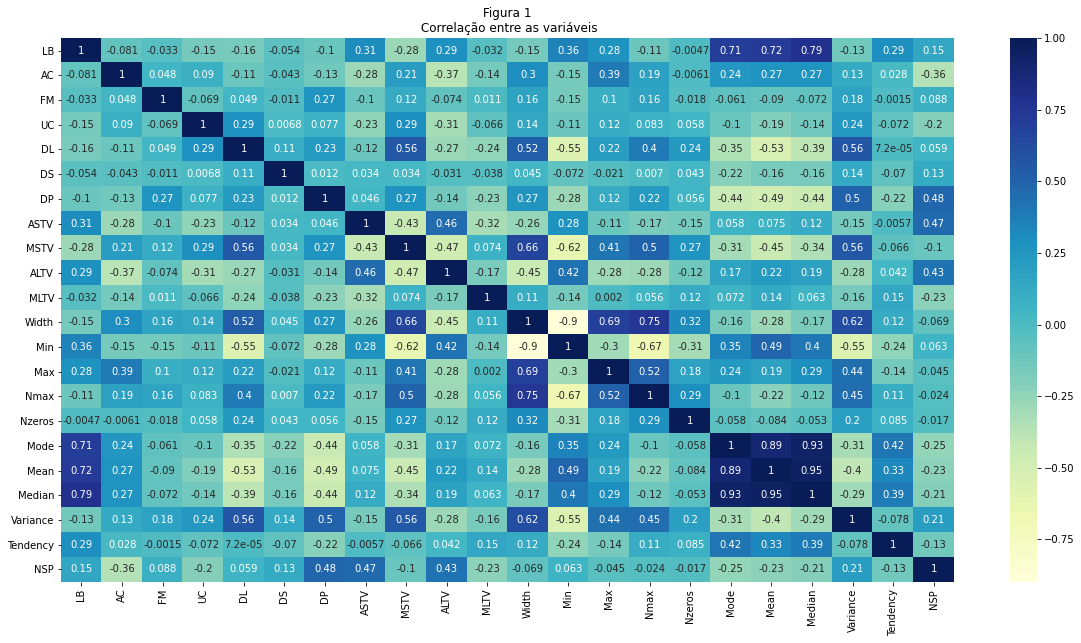

In [32]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Figura 1\n Correlação entre as variáveis')
plt.show()

## Balanceamento de dados

In [26]:
sm = smote(sampling_strategy='not majority', random_state=42, k_neighbors=5)

In [27]:
X_balanced, y_balanced = sm.fit_resample(X, y)
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

In [28]:
df_balanced.shape

(4965, 22)

In [30]:
df_balanced[df_balanced.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']]

,mean,std,min,25%,50%,75%,max
LB,135.100705,9.843473,106.0,128.000000,134.000000,143.000,160.000
AC,0.001552,0.002958,0.0,0.000000,0.000000,0.002,0.019
FM,0.012083,0.049934,0.0,0.000000,0.000770,0.004,0.481
UC,0.003701,0.003093,0.0,0.000825,0.003359,0.006,0.015
DL,0.002021,0.003177,0.0,0.000000,0.000000,0.003,0.015
DS,0.000012,0.000101,0.0,0.000000,0.000000,0.000,0.001
DP,0.000474,0.000987,0.0,0.000000,0.000000,0.000,0.005
ASTV,56.221349,16.465612,12.0,46.000000,60.000000,66.000,87.000
MSTV,1.219440,0.990519,0.2,0.400000,0.900000,1.800,7.000
ALTV,18.815509,25.475894,0.0,0.000000,4.000000,32.000,91.000


In [31]:
describe = df[df.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']].copy()
describe_balanced = df_balanced[df_balanced.columns.to_list()[:-1]].describe().T[['mean','std','min','25%','50%','75%','max']]
abs(describe - describe_balanced)

,mean,std,min,25%,50%,75%,max
LB,1.796848,0.002629,0.0,2.000000,1.000000,3.000,0.0
AC,0.001626,0.000908,0.0,0.000000,0.002000,0.004,0.0
FM,0.002603,0.003268,0.0,0.000000,0.000770,0.001,0.0
UC,0.000666,0.000147,0.0,0.001175,0.000641,0.001,0.0
DL,0.000131,0.000216,0.0,0.000000,0.000000,0.000,0.0
DS,0.000008,0.000043,0.0,0.000000,0.000000,0.000,0.0
DP,0.000315,0.000397,0.0,0.000000,0.000000,0.000,0.0
ASTV,9.231227,0.727202,0.0,14.000000,11.000000,5.000,0.0
MSTV,0.113345,0.107277,0.0,0.300000,0.300000,0.100,0.0
ALTV,8.968848,7.079014,0.0,0.000000,4.000000,21.000,0.0


## Normalização

In [33]:
scaler = min_max_scaler()

In [34]:
X_scaled = scaler.fit_transform(X_balanced)

In [39]:
X_scaled[:3]

array([[0.25925926, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.81333333, 0.04411765, 0.47252747,
        0.04733728, 0.34463277, 0.11009174, 0.03448276, 0.11111111,
        0.        , 0.47244094, 0.58715596, 0.40366972, 0.27137546,
        1.        ],
       [0.48148148, 0.31578947, 0.        , 0.4       , 0.2       ,
        0.        , 0.        , 0.06666667, 0.27941176, 0.        ,
        0.20512821, 0.71751412, 0.16513761, 0.65517241, 0.33333333,
        0.1       , 0.63779528, 0.57798165, 0.57798165, 0.04460967,
        0.5       ],
       [0.5       , 0.15789474, 0.        , 0.53333333, 0.2       ,
        0.        , 0.        , 0.05333333, 0.27941176, 0.        ,
        0.2642998 , 0.71751412, 0.16513761, 0.65517241, 0.27777778,
        0.1       , 0.63779528, 0.56880734, 0.55963303, 0.04832714,
        0.5       ]])

## Salvamento

In [40]:
df_scaled = pd.DataFrame(data=X_scaled, columns=df_balanced.columns.to_list()[:-1])

In [42]:
result = pd.concat([df_scaled,y_balanced], axis=1)

In [44]:
result.to_csv('CTG_pre_processado.csv', index=False)